<a href="https://colab.research.google.com/github/jparkgit/NumPy/blob/master/HW4_Pytorch_GLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1903055 박지현 (생명과학과)

# 1. Logistic regression with Pytorch
## 1.1 Preparation of data

Here, we will build binary logistic regression models with Python that will predict whether a breast cancer tumor is malignant or benign (malignant or benign will be our response variable). We will use the Breast Cancer Wisconsin (Diagnostic) Data Set available from sklearn.datasets.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, TensorDataset

We can import this data as follows:

In [2]:
from sklearn.datasets import load_breast_cancer
cancer1 = load_breast_cancer()

In [3]:
print("Predictors: ", cancer1.feature_names)

Predictors:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
print("\nResponse: ", cancer1.target_names)


Response:  ['malignant' 'benign']


Here we can see that there are 30 predictors available in our dataset that can be used in our logistic regression models.

Purely for convenience, we convert this sklearn.utils.Bunch object to a pandas.DataFrame as pandas DataFrames are a very commonly used data structure. We then use the shape property to see it has 569 rows and 30 columns.

In [5]:
import pandas as pd

cancer = pd.DataFrame(cancer1.data, columns=cancer1.feature_names)
cancer.columns = cancer.columns.str.replace(' ','_')
cancer.shape

(569, 30)

In [6]:
cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
X = torch.tensor(cancer.values, dtype=torch.float32)
# cancer.shape = [569, 30], X.shape = [569, 30]

X_mean = torch.mean(X, axis=0)
X_std = torch.std(X, axis=0)
XX = (X-X_mean)/X_std

# number of rows
n=XX.shape[0]

XX.shape

torch.Size([569, 30])

In [8]:
cancer1.target[:50]
# 1 means malignant.

Y = torch.tensor(cancer1.target, dtype=torch.float32).reshape([n,1])

In [9]:
Y.shape

torch.Size([569, 1])

In [10]:
dataset = TensorDataset(XX,Y)
trainloader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)

In [11]:
len(dataset)

569

In [12]:
torch.manual_seed(2023)

# 전체 데이터의 70%로 train
train_size = int(0.7 * len(dataset))
# the rest is for test
test_size = len(dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

## Exercise 1

Using the data above, we want to build the logistic regression model to predict whether the tumor is malignant or benign. Answer the following questions.

1. Train the model.

2. You want to predict the probability of malignant for the first person `X[0, ]`. Calculate the probability of malignant for the first person.

In [13]:
cancer.iloc[0, :]

mean_radius                  17.990000
mean_texture                 10.380000
mean_perimeter              122.800000
mean_area                  1001.000000
mean_smoothness               0.118400
mean_compactness              0.277600
mean_concavity                0.300100
mean_concave_points           0.147100
mean_symmetry                 0.241900
mean_fractal_dimension        0.078710
radius_error                  1.095000
texture_error                 0.905300
perimeter_error               8.589000
area_error                  153.400000
smoothness_error              0.006399
compactness_error             0.049040
concavity_error               0.053730
concave_points_error          0.015870
symmetry_error                0.030030
fractal_dimension_error       0.006193
worst_radius                 25.380000
worst_texture                17.330000
worst_perimeter             184.600000
worst_area                 2019.000000
worst_smoothness              0.162200
worst_compactness        

In [14]:
XX.shape

torch.Size([569, 30])

In [15]:
class my_logistic_class(torch.nn.Module):
    def __init__(self, in_units, units):
        super().__init__()
        self.linear = torch.nn.Linear(in_units, units, bias=True)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, X):
        temp = self.sigmoid(self.linear(X))
        return temp

In [16]:
logistic_model = my_logistic_class(30,1)

def neg_log_lik(phat,y):
    out = -1 * torch.mean(y * torch.log(phat) + (1 - y) * torch.log(1 - phat))
    return out

my_optimizer = torch.optim.SGD(logistic_model.parameters(), lr = 0.1)

In [17]:
epochs=100
history=[]
n=XX.shape[0]


for epoch in range(epochs):
  LOSS_sum = 0
  for xx, yy in trainloader:
    phat = logistic_model(xx)
    loss = neg_log_lik(phat, yy)
    LOSS_sum = LOSS_sum + loss.item() * len(yy)
    my_optimizer.zero_grad()
    loss.backward()
    my_optimizer.step()
  history.append(LOSS_sum/n)


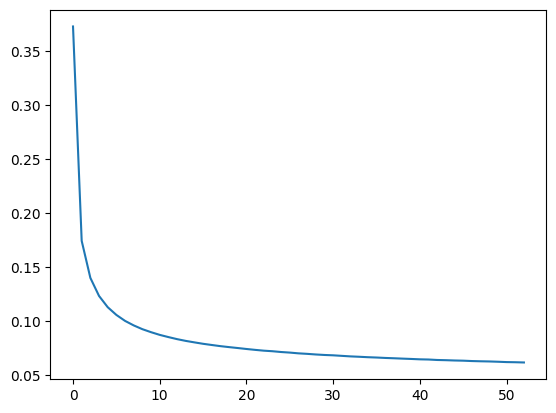

In [18]:
plt.plot(history)

You want to predict the probability of malignant for the first person X[0, ]. Calculate the probability of malignant for the first person.

In [41]:
phat = logistic_model(XX)
phat[0,]

tensor([nan], grad_fn=<SelectBackward0>)

??

In [36]:
person1 = XX[0,]
person1.shape

torch.Size([30])

In [37]:
person1 = person1.reshape([1,-1])
person1.shape

torch.Size([1, 30])

In [38]:
person1

tensor([[ 1.0961, -2.0715,  1.2688,  0.9835,  1.5671,  3.2806,  2.6505,  2.5302,
          2.2156,  2.2538,  2.4875, -0.5648,  2.8305,  2.4854, -0.2138,  1.3157,
          0.7234,  0.6602,  1.1477,  0.9063,  1.8850, -1.3581,  2.3016,  1.9995,
          1.3065,  2.6144,  2.1077,  2.2941,  2.7482,  1.9353]])

In [39]:
phat = logistic_model(person1)
phat

tensor([[nan]], grad_fn=<SigmoidBackward0>)

??


  
3. Consider the first person whose mean_radius has shurunked from `17.990000` to `5.00000`. What is the probability of malignant.

4. Calculate the Test accuracy.

In [ ]:
Yhat = (Phat>0.5).type(torch.float32)
accuracy = torch.mean((Y == Yhat).type(torch.float32))
accuracy

# 2. Poisson regression with Pytorch
## 2.1 Preparation of data

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
df = pd.read_csv(r"/content/drive/MyDrive/4-2/통프/competition_awards_data.csv",  sep = ',', header= 0 )
df.head()

,Awards,Math Score
0,0,43
1,0,38
2,0,41
3,0,33
4,0,39


In [91]:
x = torch.tensor(df['Math Score'].values, dtype=torch.float32)
n = len(x)

x_mean = torch.mean(x)
x_std = torch.std(x)
xx = (x-x_mean)/x_std

y = df['Awards'].values

ones = torch.ones([n])
X = torch.stack([ones, xx], axis=1)
Y = torch.tensor(y.reshape([n,1]), dtype=torch.float32)

dataset1 = TensorDataset(X,Y)
trainloader1 = DataLoader(dataset=dataset1, batch_size=32, shuffle=True)

In [77]:
torch.manual_seed(2023)
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

trainloader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
testloader = DataLoader(dataset=test_dataset, batch_size=test_size, shuffle=True)

## Exercise 2:

Using the data above, we want to build the poisson regression model to predict the number of awards.

Model 1
```
Awards ~ exp(beta0 + beta1 * MathScore)
```

Answer the following questions.

1. Train the model.

2. You want to predict the number of awards for a person having `Math Score = 47`. Calculated the predicted number of awards for this person.

You are also considering the following model

Model 2
```
Awards ~ exp(beta0 + beta1 * MathScore + beta2 * MathScore**2)
```

3. Calculate the Test MSE for each model. Which model is better in terms of Test MSE?

1. Train the model

In [95]:
# 우리가 훈련시키고 싶은 것: beta
beta = torch.tensor(torch.randn([2,1])*0.01, requires_grad=True)

def model(xx):
  temp = torch.exp(xx @ beta)
  return temp

def criterion(yhat, yy):
  temp = -torch.mean(-yhat + yy*torch.log(yhat)-torch.lgamma(yy+1))
  return temp

my_optimizer = torch.optim.SGD([beta], lr=0.01)

<ipython-input-95-a6be6ce872d7>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  beta = torch.tensor(torch.randn([2,1])*0.01, requires_grad=True)


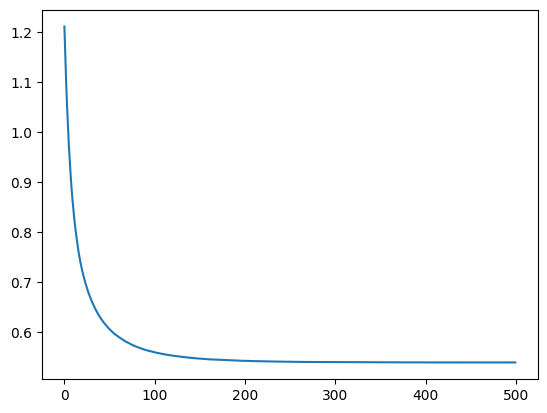

In [96]:
epochs=500
history=[]

for epoch in range(epochs):
  LOSS_sum = 0
  for xx, yy in trainloader1:
    yhat = model(xx)
    loss = criterion(yhat, yy)
    LOSS_sum = LOSS_sum + loss * len(yy)
    my_optimizer.zero_grad()
    loss.backward()
    my_optimizer.step()
  history.append(LOSS_sum.item()/n)

plt.plot(history)

2. Calculate the predicted number of awards for this person: Math Score = 47.

In [80]:
one = torch.tensor([1])
myx = torch.tensor([47.])
myxx = (myx-x_mean)/x_std
myX = torch.stack([one, myxx], axis=1)
yhat = model(myX)
yhat

tensor([[0.1641]], grad_fn=<ExpBackward0>)

Model 2\
`Awards ~ exp(beta0 + beta1 * MathScore + beta2 * MathScore**2)`

In [89]:
X2 = torch.stack([ones, x, x**2], axis=1)
X_mean = torch.mean(X2, axis=0)
X_sd = torch.std(X2, axis=0)
X2 = (X2-X_mean)/X_sd
X2[:, 0]=torch.ones([1])
X2

tensor([[ 1.0000, -0.4029, -0.4866],
        [ 1.0000, -0.6640, -0.6677],
        [ 1.0000, -0.5074, -0.5617],
        [ 1.0000, -0.9252, -0.8265],
        [ 1.0000, -0.6118, -0.6333],
        [ 1.0000, -0.4029, -0.4866],
        [ 1.0000, -0.8207, -0.7657],
        [ 1.0000, -0.5074, -0.5617],
        [ 1.0000, -0.7685, -0.7339],
        [ 1.0000, -0.6640, -0.6677],
        [ 1.0000,  0.4849,  0.2966],
        [ 1.0000, -1.0818, -0.9110],
        [ 1.0000, -0.9774, -0.8556],
        [ 1.0000, -1.0818, -0.9110],
        [ 1.0000, -0.7163, -0.7012],
        [ 1.0000, -0.3507, -0.4476],
        [ 1.0000, -0.2985, -0.4078],
        [ 1.0000, -0.3507, -0.4476],
        [ 1.0000, -0.7163, -0.7012],
        [ 1.0000, -0.4029, -0.4866],
        [ 1.0000, -0.8729, -0.7965],
        [ 1.0000, -0.5596, -0.5979],
        [ 1.0000, -0.8729, -0.7965],
        [ 1.0000, -0.6640, -0.6677],
        [ 1.0000, -0.9774, -0.8556],
        [ 1.0000, -0.4551, -0.5246],
        [ 1.0000,  0.6938,  0.5185],
 

In [106]:
dataset2 = TensorDataset(X2,Y)
trainloader2 = DataLoader(dataset=dataset2, batch_size=32, shuffle=True)

In [93]:
# 우리가 훈련시키고 싶은 것: beta
beta = torch.tensor(torch.randn([3,1])*0.01, requires_grad=True)

def model(xx):
  temp = torch.exp(xx @ beta)
  return temp

def criterion(yhat, yy):
  temp = -torch.mean(-yhat + yy*torch.log(yhat)-torch.lgamma(yy+1))
  return temp

my_optimizer = torch.optim.SGD([beta], lr=0.01)

<ipython-input-93-f7bbd2ca23df>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  beta = torch.tensor(torch.randn([3,1])*0.01, requires_grad=True)


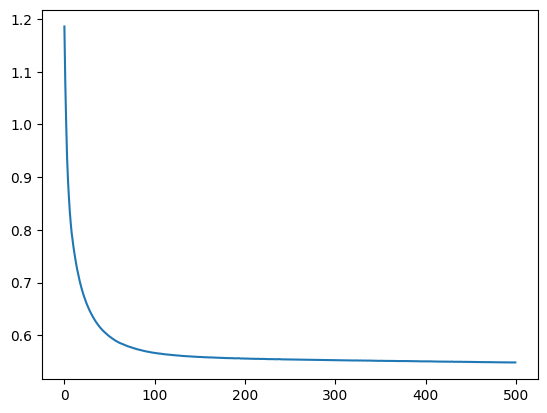

In [94]:
epochs=500
history=[]

for epoch in range(epochs):
  LOSS_sum = 0
  for xx, yy in trainloader2:
    yhat = model(xx)
    loss = criterion(yhat, yy)
    LOSS_sum = LOSS_sum + loss * len(yy)
    my_optimizer.zero_grad()
    loss.backward()
    my_optimizer.step()
  history.append(LOSS_sum.item()/n)

plt.plot(history)

3. Calculate the Test MSE for each model. Which model is better in terms of Test MSE?

Model 1

In [116]:
beta = torch.tensor(torch.randn([2,1])*0.01, requires_grad=True)
epochs=500
for epoch in range(epochs):
  LOSS_sum = 0
  for xx, yy in trainloader1:
    yhat = model(xx)
    loss = criterion(yhat, yy)
    LOSS_sum = LOSS_sum + loss * len(yy)
    my_optimizer.zero_grad()
    loss.backward()
    my_optimizer.step()
Yhat1 = model(X)
torch.mean((Y-Yhat1)**2)

<ipython-input-116-179cd37739c2>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  beta = torch.tensor(torch.randn([2,1])*0.01, requires_grad=True)


tensor(1.2434, grad_fn=<MeanBackward0>)

MSE for model 1 = 1.2434

Model 2

In [107]:
beta = torch.tensor(torch.randn([3,1])*0.01, requires_grad=True)
epochs=500
for epoch in range(epochs):
  LOSS_sum = 0
  for xx, yy in trainloader2:
    yhat = model(xx)
    loss = criterion(yhat, yy)
    LOSS_sum = LOSS_sum + loss * len(yy)
    my_optimizer.zero_grad()
    loss.backward()
    my_optimizer.step()
Yhat2 = model(X2)
torch.mean((Y-Yhat2)**2)

<ipython-input-107-0df9575b9895>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  beta = torch.tensor(torch.randn([3,1])*0.01, requires_grad=True)


tensor(1.2352, grad_fn=<MeanBackward0>)

MSE for model 2 = 1.2352

Both perform similarly but model 2 is slightly better